In [242]:
import re
import pickle
import operator
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

import warnings
warnings.filterwarnings("ignore")

## Datasets

In [140]:
books = pd.read_csv(r"BX-Books.csv", error_bad_lines=False, encoding='ISO-8859-1')
users = pd.read_csv(r"BX-Users.csv", error_bad_lines=False, encoding='ISO-8859-1')
ratings = pd.read_csv(r"BX-Book-Ratings.csv", error_bad_lines=False, encoding='ISO-8859-1')

print("Books Data:    ", books.shape)
print("Users Data:    ", users.shape)
print("Books-ratings: ", ratings.shape)

Books Data:     (271379, 5)
Users Data:     (278859, 3)
Books-ratings:  (1048575, 3)


## Pre-processing
#### Books Dataset Pre-processing

In [141]:
print("Columns: ", list(books.columns))
books

Columns:  ['isbn', 'book_title', 'book_author', 'year_of_publication', 'publisher']


,isbn,book_title,book_author,year_of_publication,publisher
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company
...,...,...,...,...,...
271374,440400988,There's a Bat in Bunk Five,Paula Danziger,1988,Random House Childrens Pub (Mm)
271375,525447644,From One to One Hundred,Teri Sloat,1991,Dutton Books
271376,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,HarperSanFrancisco
271377,192126040,Republic (World's Classics),Plato,1996,Oxford University Press


In [142]:
## Checking for null values
books.isnull().sum() 

isbn                   0
book_title             0
book_author            1
year_of_publication    0
publisher              2
dtype: int64

In [143]:
books.loc[books['book_author'].isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher
187700,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing


In [144]:
books.loc[books['publisher'].isnull(),:]

,isbn,book_title,book_author,year_of_publication,publisher
128896,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN
129043,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN


In [145]:
books.at[187700 ,'book_author'] = 'Other'

books.at[128896 ,'publisher'] = 'Other'
books.at[129043 ,'publisher'] = 'Other'

In [146]:
## Checking for null values
books.isnull().sum() 

isbn                   0
book_title             0
book_author            0
year_of_publication    0
publisher              0
dtype: int64

In [147]:
books.dtypes

isbn                   object
book_title             object
book_author            object
year_of_publication    object
publisher              object
dtype: object

In [148]:
## Checking for column Year-of-publication
books['year_of_publication'].unique()

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', 'John Peterman', '1955',
       '1946', '1936', '1930', '2011', '1925', '1948', '1943', '1947',
       '1945', '1923', '2020', '1939', '1926', '1938', '2030',
       '\\"Freedom Song\\""', '1911', '1904', '1949', 'Frank Muir',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', 'ROBERT A. WILSON', '1933', '1902', 'Karen T. Whittenburg',
       '1924', '1921', '1900', '2038', '2026', 'George H. Scherr', '1944',
       '191

In [149]:
books.loc[books['year_of_publication'] == 'John Peterman',:]

,isbn,book_title,book_author,year_of_publication,publisher
6450,735201994,Peterman Rides Again: Adventures Continue with...,"the Catalog Business""",John Peterman,2000


In [150]:
books.loc[books['year_of_publication'] == '\\"Freedom Song\\""',:]

,isbn,book_title,book_author,year_of_publication,publisher
43665,330482750,"Three Novels: \A Strange and Sublime Address\""","\""Afternoon Raag\""","\""Freedom Song\""""",Amit Chaudhuri


In [151]:
books.loc[books['year_of_publication'] == 'Frank Muir',:]

,isbn,book_title,book_author,year_of_publication,publisher
51749,413326608,"Upon my word!: More stories from \My word!\"" a...","Tony Shryane""",Frank Muir,1974


In [152]:
books.loc[books['year_of_publication'] == 'ROBERT A. WILSON',:]

,isbn,book_title,book_author,year_of_publication,publisher
92036,440500702,Schrodinger's Cat Trilogy : \The Universe Next...,"\""The Homing Pigeons\""""",ROBERT A. WILSON,1988


In [153]:
books.loc[books['year_of_publication'] == 'Karen T. Whittenburg',:]

,isbn,book_title,book_author,year_of_publication,publisher
104317,373166982,"Please Say \I Do\"" (Three Weddings &amp","A Hurricane) (Harlequin American Romance, No ...",Karen T. Whittenburg,1997


In [154]:
books.loc[books['year_of_publication'] == 'George H. Scherr',:]

,isbn,book_title,book_author,year_of_publication,publisher
121766,894805959,The Best of the Journal of Irreproducible Resu...,"Unfounded Findings\""""",George H. Scherr,1989


In [155]:
books.loc[books['year_of_publication'] == 'Salvador de Madariaga',:]

,isbn,book_title,book_author,year_of_publication,publisher
144056,8423920143,"GuÃ­a del lector del \Quijote\"": Ensayo psicol...","14 : Ensayo)""",Salvador de Madariaga,1976


In [156]:
books.loc[books['year_of_publication'] == 'K.C. Constantine',:]

,isbn,book_title,book_author,year_of_publication,publisher
150787,034050823X,"The Double Detective: \The Blank Page\"" &amp","\""A Fix Like This\"" (Crime Club)""",K.C. Constantine,1990


In [157]:
books.loc[books['year_of_publication'] == 'Stan Berenstain',:]

,isbn,book_title,book_author,year_of_publication,publisher
157126,039482492X,"C is for Clown: A Circus of \C\"" Words, (Brigh...","early books for beginning beginners)""",Stan Berenstain,1972


In [158]:
books.loc[books['year_of_publication'] == 'Francine Pascal',:]

,isbn,book_title,book_author,year_of_publication,publisher
180187,553570722,"\R\"" for Revenge: Written by Kate William",Created by Francine Pascal (Sweet Valley High...,Francine Pascal,1997


In [159]:
books.loc[books['year_of_publication'] == 'Luella Hill',:]

,isbn,book_title,book_author,year_of_publication,publisher
185736,096401811X,"Solid as a rock \I\"" stand: Inspirational poet...","short stories""",Luella Hill,1998


In [160]:
books.loc[books['year_of_publication'] == 'John Alderson Foote',:]

,isbn,book_title,book_author,year_of_publication,publisher
209386,085409878X,"\Pie-powder\""","being dust from the law courts,""",John Alderson Foote,1973


In [161]:
books.loc[books['year_of_publication'] == 'DK Publishing Inc',:]

,isbn,book_title,book_author,year_of_publication,publisher
209550,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221691,789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


In [162]:
books.loc[books['year_of_publication'] == 'Jules Janin',:]

,isbn,book_title,book_author,year_of_publication,publisher
220624,1874100055,"\The Dead Donkey\"" &amp","\""The Guillotined Woman\""""",Jules Janin,0


In [163]:
books.loc[books['year_of_publication'] == 'Gallimard',:]

,isbn,book_title,book_author,year_of_publication,publisher
220744,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...


In [164]:
books.loc[books['year_of_publication'] == ' &amp',:]

,isbn,book_title,book_author,year_of_publication,publisher
227931,6479839,The LaVyrle Spencer Collection: Three Classic...,"\""Forsaking All Others\""",&amp,"\""A Promise to Cherish\"")"""


In [165]:
books.loc[books['year_of_publication'] == ' Learning"',:]

,isbn,book_title,book_author,year_of_publication,publisher
228955,807735132,"\The Having of Wonderful Ideas\"" &amp",Other Essays on Teaching &amp,"Learning""",Eleanor Duckworth


In [166]:
books.loc[books['year_of_publication'] == 'Isadora Duncan',:]

,isbn,book_title,book_author,year_of_publication,publisher
245931,394720784,"\Your Isadora\"": The love story of Isadora Dun...","Gordon Craig""",Isadora Duncan,1976


In [167]:
books.loc[books['year_of_publication'] == 'Beatrix Potter',:]

,isbn,book_title,book_author,year_of_publication,publisher
251294,723245827,\The World of Peter Rabbit &amp,"Friends\"" Complete Story Collection""",Beatrix Potter,1999


In [168]:
books.loc[books['year_of_publication'] == 'Bart Rulon',:]

,isbn,book_title,book_author,year_of_publication,publisher
259939,1581801653,Artist\s Photo Reference: Water &amp,"Skies (Artists Photo Reference)""",Bart Rulon,2002


In [169]:
books.loc[books['year_of_publication'] == 'Alan Rich',:]

,isbn,book_title,book_author,year_of_publication,publisher
261527,006263545X,Ludwig van Beethoven: Play by Play/Symphony No...,"The \""Egmont\"" Overture""",Alan Rich,1995


In [170]:
books.loc[books.isbn == '735201994', 'year_of_publication'] = 2000
books.loc[books.isbn == '735201994', 'book_author'] = " the Catalog Business"
books.loc[books.isbn == '735201994', 'publisher'] = "John Peterman"
books.loc[books.isbn == '735201994', 'book_title'] = "Peterman Rides Again: Adventures Continue with the Real \J. Peterman\" Through Life &amp"

In [171]:
books.loc[books.isbn == '413326608', 'year_of_publication'] = 1974
books.loc[books.isbn == '413326608', 'book_author'] = " Tony Shryane"
books.loc[books.isbn == '413326608', 'publisher'] = "Frank Muir"
books.loc[books.isbn == '413326608', 'book_title'] = "Upon my word!: More stories from \My word!\" a panel game devised by Edward J. Mason &amp"

In [172]:
books.loc[books.isbn == '440500702', 'year_of_publication'] = 1988
books.loc[books.isbn == '440500702', 'book_author'] = "The Homing Pigeons"
books.loc[books.isbn == '440500702', 'publisher'] = "ROBERT A. WILSON"
books.loc[books.isbn == '440500702', 'book_title'] = "Schrodinger's Cat Trilogy : \The Universe Next Door\", \"The Trick Top Hat\", &amp"

In [173]:
books.loc[books.isbn == '373166982', 'year_of_publication'] = 1997
books.loc[books.isbn == '373166982', 'book_author'] = " A Hurricane (Harlequin American Romance, No 698)"
books.loc[books.isbn == '373166982', 'publisher'] = "Karen T. Whittenburg"
books.loc[books.isbn == '373166982', 'book_title'] = "Please Say \I Do Three Weddings &amp"

In [174]:
books.loc[books.isbn == '894805959', 'book_title'] = "The Best of the Journal of Irreproducible Results: \Improbable Investigations &amp"
books.loc[books.isbn == '894805959', 'book_author'] = " Unfounded Findings"
books.loc[books.isbn == '894805959', 'year_of_publication'] = 1989
books.loc[books.isbn == '894805959', 'publisher'] = "George H. Scherr"

In [175]:
books.loc[books.isbn == '8423920143', 'book_title'] = "GuÃ­a del lector del \Quijote\": Ensayo psicolÃ³gico sobre el \"Quijote\" (Selecciones austral "
books.loc[books.isbn == '8423920143', 'book_author'] = "Ensayo"
books.loc[books.isbn == '8423920143', 'year_of_publication'] = 1976
books.loc[books.isbn == '8423920143', 'publisher'] = "Salvador de Madariaga"

In [176]:
books.loc[books.isbn == '034050823X', 'book_title'] = "The Double Detective: \The Blank Page\" &amp"
books.loc[books.isbn == '034050823X', 'book_author'] = " \"A Fix Like This\" (Crime Club)"
books.loc[books.isbn == '034050823X', 'year_of_publication'] = 1990
books.loc[books.isbn == '034050823X', 'publisher'] = "K.C. Constantine"

In [177]:
books.loc[books.isbn == '039482492X', 'book_title'] = "C is for Clown: A Circus of \C\" Words, Bright &amp"
books.loc[books.isbn == '039482492X', 'book_author'] = " early books for beginning beginners"
books.loc[books.isbn == '039482492X', 'year_of_publication'] = 1972
books.loc[books.isbn == '039482492X', 'publisher'] = "Stan Berenstain"

In [178]:
books.loc[books.isbn == '553570722', 'book_title'] = "\R\" for Revenge: Written by Kate William "
books.loc[books.isbn == '553570722', 'book_author'] = " Created by Francine Pascal (Sweet Valley High Super Thriller, No 24)"
books.loc[books.isbn == '553570722', 'year_of_publication'] = 1997
books.loc[books.isbn == '553570722', 'publisher'] = "Francine Pascal"

In [179]:
books.loc[books.isbn == '096401811X', 'book_title'] = "Solid as a rock \I\" stand: Inspirational poetry &amp"
books.loc[books.isbn == '096401811X', 'book_author'] = "short stories"
books.loc[books.isbn == '096401811X', 'year_of_publication'] = 1998
books.loc[books.isbn == '096401811X', 'publisher'] = "Luella Hill"

In [180]:
books.loc[books.isbn == '085409878X', 'book_title'] = "\Pie-powder\""
books.loc[books.isbn == '085409878X', 'book_author'] = " being dust from the law courts"
books.loc[books.isbn == '085409878X', 'year_of_publication'] = 1973
books.loc[books.isbn == '085409878X', 'publisher'] = "John Alderson Foote"

In [181]:
books.loc[books.isbn == '078946697X', 'book_title'] = "DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)\""
books.loc[books.isbn == '078946697X', 'book_author'] = "Michael Teitelbaum"
books.loc[books.isbn == '078946697X', 'year_of_publication'] = 2000
books.loc[books.isbn == '078946697X', 'publisher'] = "DK Publishing Inc"

In [182]:
books.loc[books.isbn == '789466953', 'book_title'] = "DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)\""
books.loc[books.isbn == '789466953', 'book_author'] = "James Buckley"
books.loc[books.isbn == '789466953', 'year_of_publication'] = 2000
books.loc[books.isbn == '789466953', 'publisher'] = "DK Publishing Inc"

In [183]:
books.loc[books.isbn == '1874100055', 'book_title'] = "\The Dead Donkey\" &amp"
books.loc[books.isbn == '1874100055', 'book_author'] = " \"The Guillotined Woman\""
books.loc[books.isbn == '1874100055', 'year_of_publication'] = 0
books.loc[books.isbn == '1874100055', 'publisher'] = "Jules Janin"

In [184]:
books.loc[books.isbn == '2070426769', 'book_title'] = "Peuple du ciel, suivi de 'Les Bergers\";Jean-Marie Gustave Le"
books.loc[books.isbn == '2070426769', 'book_author'] = "Jean-Marie Gustave Le"
books.loc[books.isbn == '2070426769', 'year_of_publication'] = 2003
books.loc[books.isbn == '2070426769', 'publisher'] = "Gallimard"

In [185]:
books.loc[books.isbn == '6479839', 'book_title'] = "The LaVyrle Spencer Collection:  Three Classic Love Stories to Treasure \Separate Beds\""
books.loc[books.isbn == '6479839', 'book_author'] = " \"Forsaking All Others\""
books.loc[books.isbn == '6479839', 'year_of_publication'] = 0
books.loc[books.isbn == '6479839', 'publisher'] = " \"A Promise to Cherish\""

In [186]:
books.loc[books.isbn == '807735132', 'book_title'] = "\"The Having of Wonderful Ideas\""
books.loc[books.isbn == '807735132', 'book_author'] = " Other Essays on Teaching &amp  Learning"
books.loc[books.isbn == '807735132', 'year_of_publication'] = 0
books.loc[books.isbn == '807735132', 'publisher'] = "Eleanor Duckworth"

In [187]:
books.loc[books.isbn == '394720784', 'book_title'] = "\Your Isadora\": The love story of Isadora Duncan"
books.loc[books.isbn == '394720784', 'book_author'] = " Gordon Craig"
books.loc[books.isbn == '394720784', 'year_of_publication'] = 1976
books.loc[books.isbn == '394720784', 'publisher'] = "Isadora Duncan"

In [188]:
books.loc[books.isbn == '723245827', 'book_title'] = "The World of Peter Rabbit"
books.loc[books.isbn == '723245827', 'book_author'] = " Friends\" Complete Story Collection"
books.loc[books.isbn == '723245827', 'year_of_publication'] = 1999
books.loc[books.isbn == '723245827', 'publisher'] = "Beatrix Potter"

In [189]:
books.loc[books.isbn == '1581801653', 'book_title'] = "Artist\s Photo Reference: Water"
books.loc[books.isbn == '1581801653', 'book_author'] = " Skies (Artists Photo Reference)"
books.loc[books.isbn == '1581801653', 'year_of_publication'] = 2002
books.loc[books.isbn == '1581801653', 'publisher'] = "Bart Rulon"

In [190]:
books.loc[books.isbn == '006263545X', 'book_title'] = "Ludwig van Beethoven: Play by Play/Symphony No.3 \Eroica\""
books.loc[books.isbn == '006263545X', 'book_author'] = " The \"Egmont\" Overture"
books.loc[books.isbn == '006263545X', 'year_of_publication'] = 1995
books.loc[books.isbn == '006263545X', 'publisher'] = "Alan Rich"

In [191]:
books.year_of_publication = pd.to_numeric(books.year_of_publication, errors = 'coerce')

In [192]:
print (sorted(books['year_of_publication'].unique()))

[0.0, 1376.0, 1378.0, 1806.0, 1897.0, 1900.0, 1901.0, 1902.0, 1904.0, 1906.0, 1908.0, 1909.0, 1910.0, 1911.0, 1914.0, 1917.0, 1919.0, 1920.0, 1921.0, 1922.0, 1923.0, 1924.0, 1925.0, 1926.0, 1927.0, 1928.0, 1929.0, 1930.0, 1931.0, 1932.0, 1933.0, 1934.0, 1935.0, 1936.0, 1937.0, 1938.0, 1939.0, 1940.0, 1941.0, 1942.0, 1943.0, 1944.0, 1945.0, 1946.0, 1947.0, 1948.0, 1949.0, 1950.0, 1951.0, 1952.0, 1953.0, 1954.0, 1955.0, 1956.0, 1957.0, 1958.0, 1959.0, 1960.0, 1961.0, 1962.0, 1963.0, 1964.0, 1965.0, 1966.0, 1967.0, 1968.0, 1969.0, 1970.0, 1971.0, 1972.0, 1973.0, 1974.0, 1975.0, 1976.0, 1977.0, 1978.0, 1979.0, 1980.0, 1981.0, 1982.0, 1983.0, 1984.0, 1985.0, 1986.0, 1987.0, 1988.0, 1989.0, 1990.0, 1991.0, 1992.0, 1993.0, 1994.0, 1995.0, 1996.0, 1997.0, 1998.0, 1999.0, 2000.0, 2001.0, 2002.0, 2003.0, 2004.0, 2005.0, 2006.0, 2008.0, 2010.0, 2011.0, 2012.0, 2020.0, 2021.0, 2026.0, 2030.0, nan, 2024.0, 2037.0, 2038.0, 2050.0]


In [193]:
books.loc[books['book_title'] == 'Peterman Rides Again: Adventures Continue with the Real \J. Peterman\" Through Life &amp',:]

,isbn,book_title,book_author,year_of_publication,publisher
6450,735201994,Peterman Rides Again: Adventures Continue with...,the Catalog Business,2000.0,John Peterman


In [194]:
# Replace all the invalid entries with mean value of year of publication

books.loc[(books.year_of_publication > 2006) | (books.year_of_publication == 0), 'year_of_publication'] = np.NAN
books.year_of_publication.fillna(round(books.year_of_publication.mean()), inplace = True)

In [195]:
books.year_of_publication.fillna(round(books.year_of_publication.mean()), inplace = True)

In [196]:
books.year_of_publication = books.year_of_publication.astype(np.int64)

In [197]:
print (sorted(books['year_of_publication'].unique()))

[1376, 1378, 1806, 1897, 1900, 1901, 1902, 1904, 1906, 1908, 1909, 1910, 1911, 1914, 1917, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006]


## Users Dataset

In [198]:
users.shape
users

,user_id,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
...,...,...,...
278854,278854,"portland, oregon, usa",NaN
278855,278855,"tacoma, washington, united kingdom",50.0
278856,278856,"brampton, ontario, canada",NaN
278857,278857,"knoxville, tennessee, usa",NaN


In [199]:
users.dtypes

user_id      object
Location     object
Age         float64
dtype: object

In [200]:
users.user_id.values

array([1, 2, 3, ..., '278856', '278857', '278858'], dtype=object)

In [201]:
## Checking null values
print(users.isna().sum())               

user_id          0
Location         1
Age         110763
dtype: int64


In [202]:
print (sorted(users.Age.unique()))

[nan, 0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 23.0, 24.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 100.0, 101.0, 102.0, 103.0, 104.0, 105.0, 106.0, 107.0, 108.0, 109.0, 110.0, 111.0, 113.0, 114.0, 115.0, 116.0, 118.0, 119.0, 123.0, 124.0, 127.0, 128.0, 132.0, 133.0, 136.0, 137.0, 138.0, 140.0, 141.0, 143.0, 146.0, 147.0, 148.0, 151.0, 152.0, 156.0, 157.0, 159.0, 162.0, 168.0, 172.0, 175.0, 183.0, 186.0, 189.0, 199.0, 200.0, 201.0, 204.0, 207.0, 208.0, 209.0, 210.0, 212.0, 219.0, 220.0, 223.0, 226.0

In [203]:
required = users[users['Age'] <= 80]
required = required[required['Age'] >= 10]

In [204]:
mean = round(required['Age'].mean())   
mean

35

In [205]:
users.loc[users['Age'] > 80, 'Age'] = mean    #outliers with age grater than 80 are substituted with mean 
users.loc[users['Age'] < 10, 'Age'] = mean    #outliers with age less than 10 years are substitued with mean
users['Age'] = users['Age'].fillna(mean)      #filling null values with mean
users['Age'] = users['Age'].astype(int)       #changing Datatype to int

In [206]:
print (sorted(users.Age.unique()))

[10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80]


In [207]:
users.loc[users['Location'].isnull(),:]

,user_id,Location,Age
275081,", milan, italy""",NaN,35


In [208]:
users.at[275081 ,'Location'] = 'Other'

In [209]:
## Checking for null values
users.isnull().sum() 

user_id     0
Location    0
Age         0
dtype: int64

## Ratings Dataset

In [210]:
ratings.shape

(1048575, 3)

In [211]:
ratings

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
...,...,...,...
1048570,250764,451410777,0
1048571,250764,452264464,8
1048572,250764,048623715X,0
1048573,250764,486256588,0


In [212]:
ratings.dtypes

user_id     int64
isbn       object
rating      int64
dtype: object

In [213]:
# n_users = users.shape[0]
# n_books = books.shape[0]

In [214]:
# print (n_users * n_books)

In [215]:
ratings.head()

,user_id,isbn,rating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6


In [216]:
## checking all ratings number or not
print(is_numeric_dtype(ratings['rating']))

True


In [217]:
## checking User-ID contains only number or not
print(is_numeric_dtype(ratings['user_id']))

True


# Merging Tables

## Merging Books and Rating Tables in One

In [218]:
dataset = pd.merge(ratings, books, on='isbn')
# dataset = pd.merge(dataset, users, on='user_id', how='inner')
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 941148 entries, 0 to 941147
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   user_id              941148 non-null  int64 
 1   isbn                 941148 non-null  object
 2   rating               941148 non-null  int64 
 3   book_title           941148 non-null  object
 4   book_author          941148 non-null  object
 5   year_of_publication  941148 non-null  int64 
 6   publisher            941148 non-null  object
dtypes: int64(3), object(4)
memory usage: 57.4+ MB


In [219]:
dataset

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
...,...,...,...,...,...,...,...
941143,250764,440106575,0,HIDDEN FIRES,JANETTE RADCLIFFE,1978,Dell
941144,250764,451157516,0,"Cheyenne (Fortunes West, No 2)",A.R. Riefe,1988,New Amer Library (Mm)
941145,250764,048623715X,0,Glamorous Movie Stars of the Thirties: Paper D...,Tom Tierney,1982,Dover Publications
941146,250764,486256588,0,Schiaparelli Fashion Review: Paper Dolls in Fu...,Tom Tierney,1988,Dover Publications


#### Checking for unique users and books

In [220]:
# Code for checking number of unique users and books. 
n_users = dataset.user_id.nunique()
n_books = dataset.isbn.nunique()

print('No. of Users: '+ str(n_users))
print('No. of Books: '+str(n_books))

No. of Users: 83644
No. of Books: 257832


#### Convert ISBN variable to numeric type in order

In [221]:
# Convert and print length of isbn list
isbn_list = dataset.isbn.unique()
print(" Length of isbn List:", len(isbn_list))
def get_isbn_numeric_id(isbn):
    # print ("  isbn is:" , isbn)
    itemindex = np.where(isbn_list==isbn)
    # print (itemindex[0][0])
    return itemindex[0][0]

 Length of isbn List: 257832


### Convert user_id variable to numeric type in order

In [222]:
# Convert and print length of user_id list
user_id_list = dataset.user_id.unique()
print(" Length of user_id List:", len(user_id_list))
def get_user_id_numeric_id(user_id):
    #print ("  isbn is:" , isbn)
    itemindex = np.where(user_id_list==user_id)
    return itemindex[0][0]

 Length of user_id List: 83644


### Convert ISBN variable to numeric type in order

In [223]:
# Convert and print length of isbn list
isbn_list = dataset.isbn.unique()
print(" Length of isbn List:", len(isbn_list))
def get_isbn_numeric_id(isbn):
    # print ("  isbn is:" , isbn)
    itemindex = np.where(isbn_list==isbn)
    return itemindex[0][0]

 Length of isbn List: 257832


In [226]:
dataset.head()

,user_id,isbn,rating,book_title,book_author,year_of_publication,publisher
0,276725,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
1,2313,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
2,6543,034545104X,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
3,8680,034545104X,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books
4,10314,034545104X,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books


#### Re-index columns to build matrix

In [227]:
# Reindexing the columns
# new_col_order = ['user_id_order', 'isbn_id', 'rating', 'book_title', 'book_author','year_of_publication','publisher','isbn','user_id']
new_col_order = ['rating', 'book_title', 'book_author','year_of_publication','publisher','isbn','user_id']
dataset = dataset.reindex(columns= new_col_order)
dataset.head()

,rating,book_title,book_author,year_of_publication,publisher,isbn,user_id
0,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,276725
1,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,2313
2,0,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,6543
3,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,8680
4,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,10314


#### Train Test Split

In [228]:
# Importing train_test_split model for splittig the data into train and test set.
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(dataset, test_size=0.20)


In [229]:
# print the shape of training and testing datasets

print (train_data.shape, test_data.shape)

(752918, 7) (188230, 7)


### Divide complete data on the basis of Implicit and Explicit ratings datasets

In [230]:
## Explicit Ratings Dataset
dataset1 = dataset[dataset['rating'] != 0]
dataset1 = dataset1.reset_index(drop = True)
dataset1.shape

(351865, 7)

In [231]:
## Implicit Ratings Dataset
dataset2 = dataset[dataset['rating'] == 0]
dataset2 = dataset2.reset_index(drop = True)
dataset2.shape

(589283, 7)

In [232]:
dataset1.head()

,rating,book_title,book_author,year_of_publication,publisher,isbn,user_id
0,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,2313
1,5,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,8680
2,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,10314
3,9,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,50403
4,8,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,034545104X,63970


## Data Visualization
### No. of books published yearly

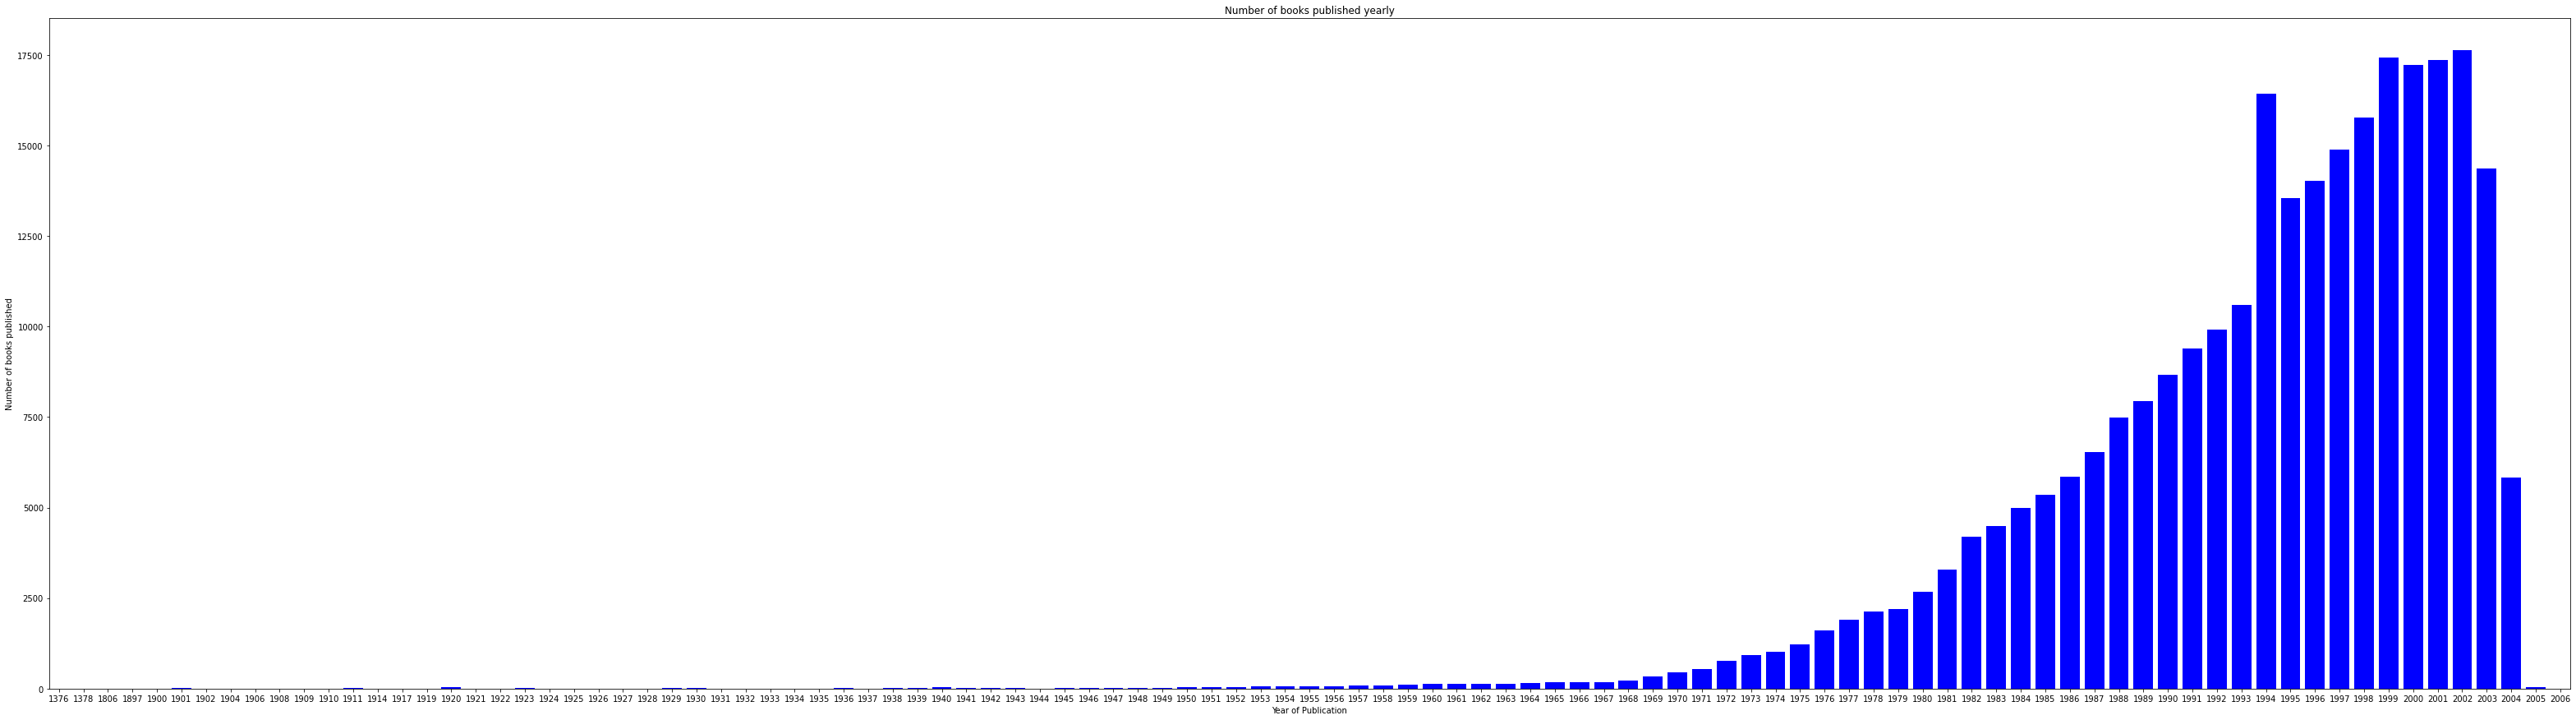

In [233]:
publications = {}
for year in books['year_of_publication']:
    if str(year) not in publications:
        publications[str(year)] = 0
    publications[str(year)] +=1

publications = {k:v for k, v in sorted(publications.items())}

fig = plt.figure(figsize =(55, 15))
plt.bar(list(publications.keys()),list(publications.values()), color = 'blue')
plt.ylabel("Number of books published")
plt.xlabel("Year of Publication")
plt.title("Number of books published yearly")
plt.margins(x = 0)
plt.show()

### Top 15 No. of books by Author

Text(0.5, 1.0, 'No of books by an author (Top 15)')

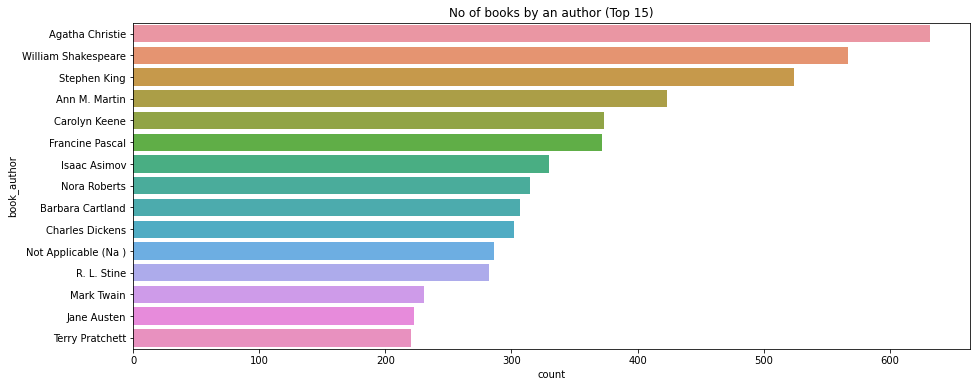

In [234]:
plt.figure(figsize=(15,6))
sns.countplot(y="book_author", data=books,order=books['book_author'].value_counts().index[0:15])
plt.title("No of books by an author (Top 15)")

### Top 15 books published by publisher

Text(0.5, 1.0, 'No of books published by a publisher (Top 15)')

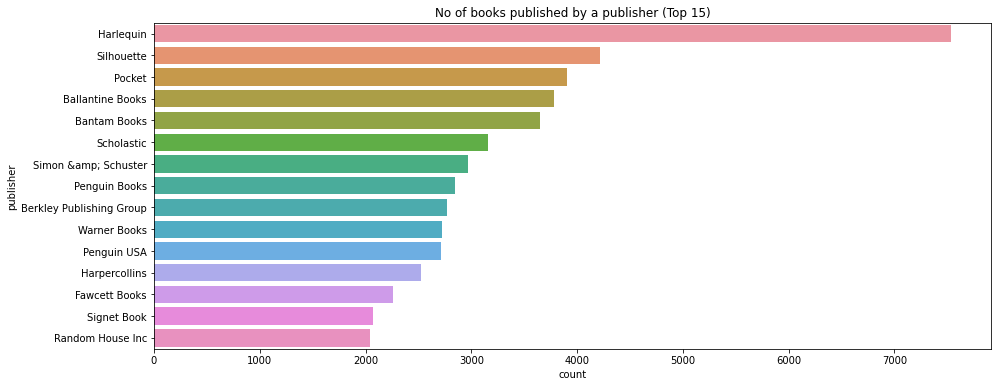

In [235]:
plt.figure(figsize=(15,6))
sns.countplot(y="publisher", data=books,order=books['publisher'].value_counts().index[0:15])
plt.title("No of books published by a publisher (Top 15)")

<AxesSubplot:xlabel='rating', ylabel='count'>

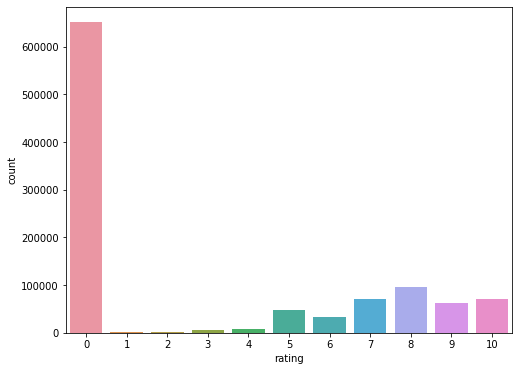

In [236]:
plt.figure(figsize=(8,6))
sns.countplot(x="rating", data=ratings)

Text(0.5, 1.0, 'Explicit Ratings')

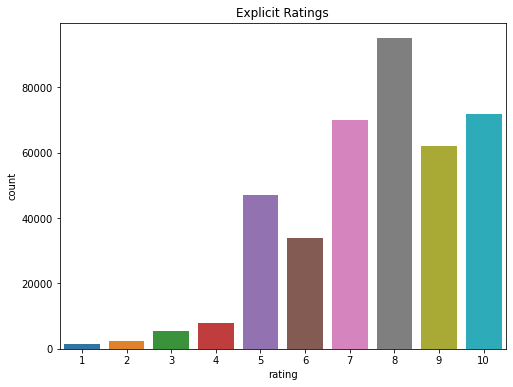

In [237]:
## Explicit Ratings
plt.figure(figsize=(8,6))
data = ratings[ratings['rating'] != 0]
sns.countplot(x="rating", data=data)
plt.title("Explicit Ratings")

Text(0.5, 1.0, 'Number of Ratings for a book (Top 15)')

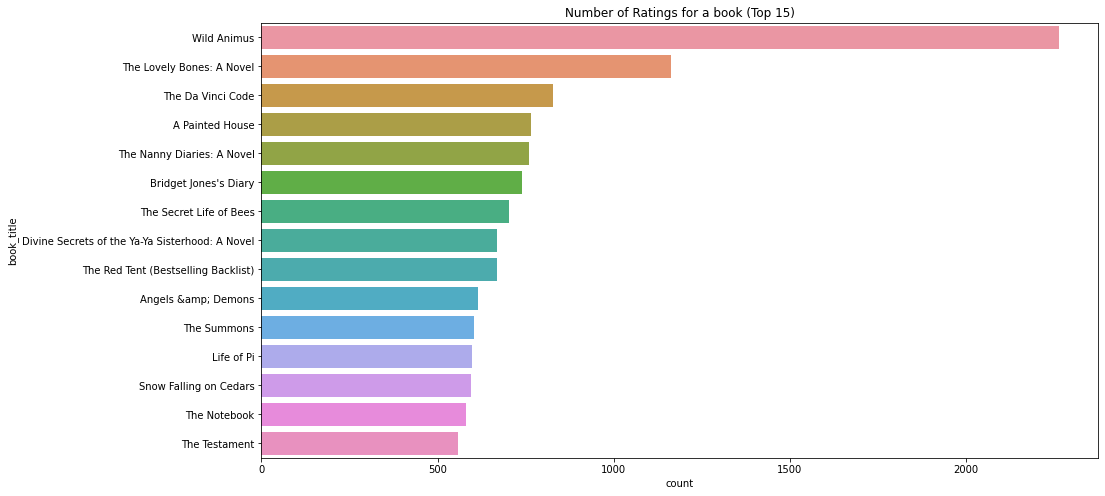

In [238]:
plt.figure(figsize=(15,8))
sns.countplot(y="book_title", data=dataset, order=dataset['book_title'].value_counts().index[0:15])
plt.title("Number of Ratings for a book (Top 15)")

## Recommendation System

In [239]:
# bookName = input("Enter a book name: ")
number = int(input("Enter number of books to recommend: "))

Enter number of books to recommend:  5


### Popularity Based (Top In whole collection)

In [240]:
def popularity_based(dataframe, n):
    if n >= 1 and n <= len(dataframe):
        data = pd.DataFrame(dataframe.groupby('isbn')['rating'].count()).sort_values('rating', ascending=False).head(n)
        result = pd.merge(data, books, on='isbn', left_index = True)
        return result
    return "Invalid number of books entered!!"

In [241]:
print("Top", number, "Popular books are: ")
popularity_based(dataset1, number)

Top 5 Popular books are: 


,isbn,rating,book_title,book_author,year_of_publication,publisher
408,316666343,635,The Lovely Bones: A Novel,Alice Sebold,2002,"Little, Brown"
26,971880107,526,Wild Animus,Rich Shapero,2004,Too Far
748,385504209,452,The Da Vinci Code,Dan Brown,2003,Doubleday
522,312195516,354,The Red Tent (Bestselling Backlist),Anita Diamant,1998,Picador USA
1105,60928336,292,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,1997,Perennial
